## Import Package

In [23]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

## Load Dataset

In [27]:
dfmain = pd.read_csv("Data_merged.csv",index_col=0)
dfmain.shape

(2079, 24)

In [28]:
dfmain["Close Price"].head()

0    1284.91
1    1261.52
2    1262.90
3    1252.31
4    1273.70
Name: Close Price, dtype: float64

In [29]:
Close = dfmain["Close Price"]

In [175]:
# import all stock prices 
# ddf = pd.read_csv("SP500-2016.csv", index_col = 0)
# df.info()

numpy.ndarray

In [47]:
# df1 = pd.read_csv("Y1layer13-9.csv",header=None)
# df1.shape

(2077, 9)

In [181]:
# df2 = pd.read_csv("Y3layer17-13-9.csv",header=None)
# df2.shape

(2079, 9)

In [5]:
# df3 = pd.read_csv("Y3layer18-14-10.csv",header=None)
# df3.shape

(2079, 10)

In [50]:
# df4 = pd.read_csv("Y5levelWT1layer13-9.csv",header=None)
# df4.shape

(2077, 9)

In [51]:
# df5 = pd.read_csv("Y5levelWT3layer17-13-9.csv",header=None)
# df5.shape


(2079, 9)

In [30]:
df6 = pd.read_csv("Y5levelWT3layer18-14-10.csv",header=None)
df6.shape

(2079, 10)

In [31]:
df6[10] = Close

In [32]:
## DataFrame "Y1layer13-9.csv" with Close 
df6.head() 

0         1         2         3         4         5         6   \
0  0.504333  0.020622  0.091492  0.994347  0.062468  0.753422  0.052363   
1  0.501698  0.026658  0.115132  0.990695  0.081316  0.703286  0.069166   
2  0.485075  0.060177  0.152833  0.973803  0.133416  0.658505  0.111763   
3  0.464489  0.116995  0.182066  0.944323  0.187973  0.661275  0.156666   
4  0.442971  0.214841  0.237523  0.874115  0.255235  0.647284  0.220174   

         7         8         9        10  
0  0.081885  0.827858  0.050652  1284.91  
1  0.108327  0.810352  0.061496  1261.52  
2  0.168914  0.781748  0.100574  1262.90  
3  0.228894  0.752713  0.158890  1252.31  
4  0.314977  0.713180  0.250511  1273.70

In [33]:
df6.shape

(2079, 11)

## Modify Dataset here--- Last column is "Close"

In [34]:
df = df6.copy() # Copy from the input dataset


In [35]:
# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

In [36]:
# number of different stocks: here is only one index of S&P 500
#print('\nnumber of different stocks: ', len(list(set(df.symbol))))
#print(list(set(df.symbol))[:10])
df.tail()

0         1         2         3         4         5         6   \
2074  0.052820  0.989874  0.999818  0.000755  0.971578  0.474959  0.999487   
2075  0.151073  0.966141  0.998049  0.005539  0.972198  0.501106  0.998768   
2076  0.172801  0.945798  0.995873  0.009931  0.986773  0.531893  0.996959   
2077  0.248866  0.895797  0.984585  0.024850  0.977304  0.540552  0.993021   
2078  0.269670  0.677560  0.999847  0.002922  0.997865  0.426223  0.995758   

            7         8         9        10  
2074  0.998146  0.002750  0.927974  2146.10  
2075  0.994376  0.011879  0.883173  2159.93  
2076  0.994175  0.019080  0.881205  2171.37  
2077  0.986591  0.044517  0.850514  2151.13  
2078  0.999581  0.009800  0.970643  2168.27

In [37]:
df.describe()

0            1            2            3            4   \
count  2079.000000  2079.000000  2079.000000  2079.000000  2079.000000   
mean      0.448633     0.476277     0.458049     0.536627     0.479204   
std       0.356879     0.427840     0.454359     0.424406     0.411453   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.104377     0.011432     0.001587     0.028218     0.032800   
50%       0.383275     0.388727     0.237523     0.644120     0.418546   
75%       0.805877     0.981591     0.998872     0.986468     0.967137   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7             8             9   \
count  2079.000000  2079.000000  2079.000000  2.079000e+03  2.079000e+03   
mean      0.563948     0.463660     0.501352  5.359262e-01  5.311102e-01   
std       0.180330     0.449585     0.423455  4.268692e-01  3.498242e-01   
min       0.018820     0.000000     0.000000  1.440392e-08  1.381651e-13   
25%       0.451564     0.004448     0.027546  2.083620e-02  2.010603e-01   
50%       0.580291     0.299352     0.453056  6.756100e-01  5.646396e-01   
75%       0.683531     0.993332     0.988503  9.781794e-01  8.693684e-01   
max       0.999369     1.000000     1.000000  1.000000e+00  1.000000e+00   

                10  
count  2079.000000  
mean   1510.099153  
std     414.400699  
min     676.530000  
25%    1173.705000  
50%    1402.890000  
75%    1940.895000  
max    2190.150000

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 11 columns):
0     2079 non-null float64
1     2079 non-null float64
2     2079 non-null float64
3     2079 non-null float64
4     2079 non-null float64
5     2079 non-null float64
6     2079 non-null float64
7     2079 non-null float64
8     2079 non-null float64
9     2079 non-null float64
10    2079 non-null float64
dtypes: float64(11)
memory usage: 178.7 KB


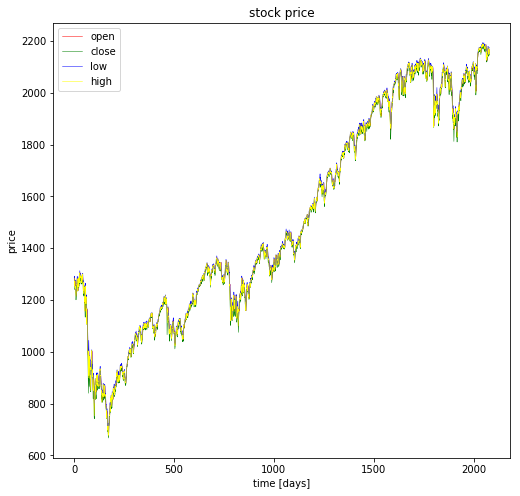

In [39]:
## This observation is only for raw_dataset, not from autoencoder result
## 'Close Price', 'Open Price','High Price','Low Price',
plt.figure(figsize=(18, 8));
plt.subplot(1,2,1);
plt.plot(dfmain['Open Price'], color='red', label='open',linewidth=0.5)
plt.plot(dfmain['Low Price'], color='green', label='close',linewidth=0.5)
plt.plot(dfmain['High Price'], color='blue', label='low',linewidth=0.5)
plt.plot(dfmain['Close Price'], color='yellow', label='high',linewidth=0.5)
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

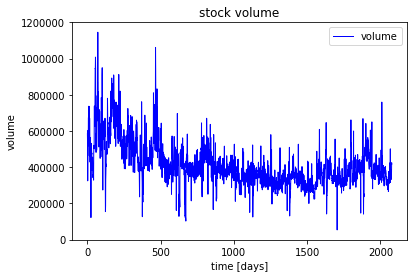

In [163]:
# plt.subplot(1,2,2);
plt.plot(dfmain["Volume"], color='b', label='volume',linewidth=1)
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');
plt.show()

## 3. Manipulate data <a class="anchor" id="3-bullet"></a> 

In [46]:
## Spring 2019
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    for i in range(df.shape[1]):
        df[i] = min_max_scaler.fit_transform(df[i].values.reshape(-1,1)) 
    return df

In [58]:
# - choose a specific stock
# - drop feature: volume
# - normalize stock data
# - create train, validation and test data sets

# function for min-max normalization of stock
# def normalize_data(df):
#     min_max_scaler = sklearn.preprocessing.MinMaxScaler()
#     df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
#     df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
#     df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
#     df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
#     return df

In [41]:
len(df)

2079

In [47]:
# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    print(len(data[0][0])) ## (len-20)*seq_len* features(include close)
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [48]:
 [x_train, y_train, x_valid, y_valid, x_test, y_test] = load_data(df, 20)

11


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
# choose one stock
df_stock = df.copy()
#df_stock.drop(['symbol'],1,inplace=True)
# df_stock.drop(['Volume'],1,inplace=True)
# df_stock.drop(['Adj Close'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
11
x_train.shape =  (1647, 19, 11)
y_train.shape =  (1647, 11)
x_valid.shape =  (206, 19, 11)
y_valid.shape =  (206, 11)
x_test.shape =  (206, 19, 11)
y_test.shape =  (206, 11)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
# plt.figure(figsize=(15, 5));
# plt.plot(df_stock_norm.Open.values, color='red', label='open')
# plt.plot(df_stock_norm.Close.values, color='green', label='low')
# plt.plot(df_stock_norm.Low.values, color='blue', label='low')
# plt.plot(df_stock_norm.High.values, color='black', label='high')
# #plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
# plt.title('stock')
# plt.xlabel('time [days]')
# plt.ylabel('normalized price/volume')
# plt.legend(loc='best')
# plt.show()

## 4. Model and validate data <a class="anchor" id="4-bullet"></a>

In [51]:
 # - RNNs with basic, LSTM, GRU cells
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
print(perm_array)
np.random.shuffle(perm_array)

[   0    1    2 ... 1644 1645 1646]


In [52]:
# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size       
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

In [53]:
# parameters
n_steps = seq_len-1 
n_inputs = 11 
n_neurons = 512 # number of units is 200
n_outputs = 11
n_layers = 5  # layers should be 5
learning_rate = 0.001
batch_size = 50 # batch size should be 60
n_epochs = 50  # should be 5000
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
#layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
    #      for layer in range(n_layers)]

# use Basic LSTM Cell 
layers = [tf.contrib.rnn.BasicLSTMCell(name='basic_lstm_cell',num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.265926/0.305517
4.98 epochs: MSE train/valid = 0.082312/0.085583
9.96 epochs: MSE train/valid = 0.040168/0.039200
14.94 epochs: MSE train/valid = 0.036471/0.036345
19.91 epochs: MSE train/valid = 0.033295/0.036042
24.89 epochs: MSE train/valid = 0.028770/0.035129
29.87 epochs: MSE train/valid = 0.026226/0.033510
34.85 epochs: MSE train/valid = 0.020650/0.033203
39.83 epochs: MSE train/valid = 0.020040/0.038987
44.81 epochs: MSE train/valid = 0.014184/0.032860
49.79 epochs: MSE train/valid = 0.010875/0.035243


In [54]:
# # 5. Predictions <a class="anchor" id="5-bullet"></a> 
y_train.shape

(1647, 11)

In [55]:
y_valid.shape

(206, 11)

In [56]:
y_test.shape

(206, 11)

correct sign prediction for close - open price for train/valid/test: 0.86/0.79/0.67


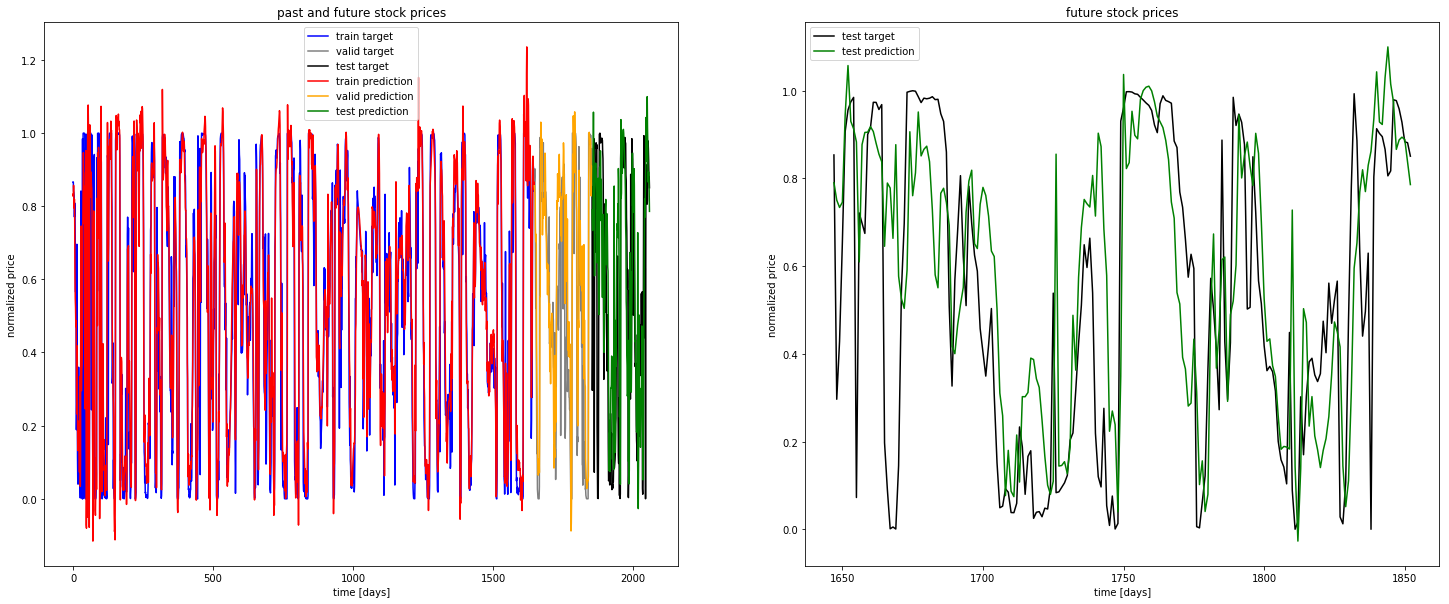

In [59]:
ft = 9  # 9 = close  # 0 = open, 1 = close, 2 = highest, 3 = lowest
## show predictions
plt.figure(figsize=(25, 10));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,3]-y_train[:,0]),
            np.sign(y_train_pred[:,3]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,3]-y_valid[:,0]),
            np.sign(y_valid_pred[:,3]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,3]-y_test[:,0]),
            np.sign(y_test_pred[:,3]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))
plt.show()